<h1 align="center"> Homework 11: Data Completion-Deep Learning </h1>
<h3 align="center"> Last Update: 12/03/2021 </h3>
<h3 align="center"> Students: Vineela Bandi, Mark Chafin </h3>

##1. Read the dataset into a pandas DataFrame. Show the datatype of variables in the dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
train_dat = pd.read_csv("/content/drive/MyDrive/MS IST/DS and ML in Python/Module8/train_data.csv")
test_dat = pd.read_csv("/content/drive/MyDrive/MS IST/DS and ML in Python/Module8/test_data.csv")

In [3]:
train_dat.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
704,0.0,0.0,0.62,0.0,0.62,0.00,0.00,0.00,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.62,0.00,0.0,1.24,0.00,0.62,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.105,0.00,1.055,0.000,0.0,2.033,16,120,1
2053,0.0,0.0,0.00,0.0,0.00,0.40,0.00,0.00,0.0,0.81,0.0,0.00,0.0,0.0,0.0,0.40,0.00,0.0,1.22,0.00,0.00,0.0,0.4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198,0.529,0.33,0.198,0.000,0.0,5.019,18,261,1
1447,0.0,0.0,0.63,0.0,0.00,1.27,1.27,0.63,0.0,0.00,0.0,0.63,0.0,0.0,0.0,0.00,0.63,0.0,4.45,3.18,3.82,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.983,0.089,0.0,3.488,59,157,1
1109,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,1.000,1,4,0
1343,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,12.19,0.00,4.87,0.0,0.0,9.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,1.000,1,7,0


In [4]:
test_dat.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
719,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.00,0.0,1.88,0.0,0.0,0.0,0.00,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.31,0.31,0.31,0.0,0.0,0.0,0.232,0.000,0.000,0.0,0.000,1.142,3,88,0
1296,0.00,0.0,0.00,0.0,2.63,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,2.63,0.0,2.63,0.0,0.0,0.0,5.26,2.63,2.63,2.63,2.63,2.63,2.63,2.63,0.0,2.63,2.63,2.63,0.0,0.0,0.0,2.63,0.0,0.00,0.0,2.63,0.00,0.00,0.0,0.0,0.0,0.793,0.000,0.000,0.0,0.000,3.076,11,40,0
857,0.00,0.0,0.54,0.0,0.54,0.00,0.0,0.0,0.0,0.54,0.0,0.00,0.0,0.0,0.0,0.54,0.0,0.0,1.64,0.0,0.54,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.54,0.00,0.0,0.0,0.0,0.096,0.000,1.443,0.0,0.000,1.969,16,130,1
677,0.97,0.0,0.00,0.0,0.48,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.48,0.0,0.0,2.42,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.48,0.0,0.00,0.48,0.97,0.0,0.0,0.0,0.150,0.000,0.000,0.0,0.075,3.367,21,165,0
115,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,1.29,0.0,0.0,0.0,0.00,0.0,0.0,1.94,0.0,2.59,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.64,0.0,0.0,0.0,0.105,0.105,0.000,0.0,0.000,1.000,1,30,0


In [5]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [6]:
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              1381 non-null   float64
 1   word_freq_address           1381 non-null   float64
 2   word_freq_all               1381 non-null   float64
 3   word_freq_3d                1381 non-null   float64
 4   word_freq_our               1381 non-null   float64
 5   word_freq_over              1381 non-null   float64
 6   word_freq_remove            1381 non-null   float64
 7   word_freq_internet          1381 non-null   float64
 8   word_freq_order             1381 non-null   float64
 9   word_freq_mail              1381 non-null   float64
 10  word_freq_receive           1381 non-null   float64
 11  word_freq_will              1381 non-null   float64
 12  word_freq_people            1381 non-null   float64
 13  word_freq_report            1381 

In [7]:
#summary statistics of train dataset
train_dat.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.099854,0.219792,0.284391,0.041627,0.306783,0.100839,0.112981,0.108127,0.087357,0.239550,0.060208,0.538217,0.094820,0.050960,0.048711,0.248795,0.143783,0.185702,1.660596,0.090025,0.805665,0.112348,0.097130,0.089326,0.545087,0.258071,0.817966,0.123457,0.099345,0.102658,0.060851,0.048152,0.102043,0.048932,0.104115,0.098155,0.133627,0.013736,0.076997,0.065071,0.039947,0.120705,0.045245,0.084677,0.303429,0.181649,0.005587,0.035149,0.039989,0.140453,0.016707,0.268132,0.072931,0.048461,5.213943,53.550311,285.312112,0.394099
std,0.285808,1.329902,0.504691,1.010729,0.654040,0.289473,0.402128,0.414894,0.255191,0.661345,0.200799,0.836783,0.297718,0.267195,0.260803,0.816513,0.445634,0.536368,1.775453,0.547965,1.182441,0.985118,0.339321,0.389735,1.705536,0.877701,3.490149,0.532749,0.596904,0.450942,0.349212,0.331636,0.587260,0.332598,0.548108,0.404493,0.417649,0.214616,0.420535,0.349375,0.344993,0.714601,0.218817,0.690045,1.049520,0.951394,0.078357,0.313863,0.251293,0.293065,0.111976,0.811123,0.223694,0.501323,33.335451,219.385696,621.036731,0.488732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.571000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [8]:
#summary statistics of test dataset
test_dat.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,1381.00000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.00000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,0.11551,0.197212,0.271948,0.120912,0.324909,0.084388,0.117067,0.098689,0.096387,0.239095,0.058928,0.549826,0.091854,0.076503,0.050355,0.248972,0.139797,0.182513,1.665605,0.075206,0.819312,0.141846,0.112172,0.105793,0.559804,0.282433,0.649182,0.128081,0.097915,0.103302,0.073852,0.044475,0.086003,0.045279,0.108436,0.095894,0.144707,0.011955,0.082433,0.06428,0.052339,0.159464,0.048088,0.066416,0.296083,0.175568,0.005112,0.024222,0.035277,0.135714,0.017604,0.271260,0.082526,0.034391,5.139220,48.960898,278.572773,0.393917
std,0.34655,1.194171,0.502937,2.025049,0.713815,0.232985,0.365437,0.366883,0.326793,0.604540,0.203344,0.917431,0.308733,0.455527,0.254306,0.847332,0.440501,0.518871,1.776184,0.407004,1.242970,1.114872,0.374526,0.546434,1.589337,0.908261,3.059694,0.552105,0.585114,0.469959,0.507780,0.321372,0.474840,0.322080,0.493511,0.398370,0.436736,0.234194,0.466110,0.35130,0.396436,0.876259,0.235116,0.422585,0.917777,0.809776,0.071208,0.205618,0.224230,0.208048,0.103159,0.826472,0.291102,0.167531,27.635828,119.688508,570.822166,0.488794
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,6.000000,33.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [9]:
#splitting the output variable from the train and test data
train_X=train_dat.drop('class', axis=1)
train_y=train_dat['class']
test_X=test_dat.drop('class', axis=1)
test_y=test_dat['class']

In [10]:
train_X.shape

(3220, 57)

In [11]:
train_y.shape

(3220,)

In [12]:
test_X.shape

(1381, 57)

In [13]:
test_y.shape

(1381,)

In [14]:
# Normalize data
from sklearn import preprocessing
train_scale = preprocessing.MinMaxScaler().fit(train_X)
train_X_scale = pd.DataFrame(train_scale.transform(train_X),columns=train_X.columns)
train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,3220.0,0.023008,0.065854,0.0,0.000000,0.000000,0.000000,1.0
word_freq_address,3220.0,0.015392,0.093130,0.0,0.000000,0.000000,0.000000,1.0
word_freq_all,3220.0,0.062641,0.111165,0.0,0.000000,0.000000,0.094714,1.0
word_freq_3d,3220.0,0.001037,0.025186,0.0,0.000000,0.000000,0.000000,1.0
word_freq_our,3220.0,0.030678,0.065404,0.0,0.000000,0.000000,0.037000,1.0
word_freq_over,3220.0,0.017149,0.049230,0.0,0.000000,0.000000,0.000000,1.0
word_freq_remove,3220.0,0.015541,0.055313,0.0,0.000000,0.000000,0.000000,1.0
word_freq_internet,3220.0,0.009732,0.037344,0.0,0.000000,0.000000,0.000000,1.0
word_freq_order,3220.0,0.033729,0.098529,0.0,0.000000,0.000000,0.000000,1.0
word_freq_mail,3220.0,0.013177,0.036378,0.0,0.000000,0.000000,0.008251,1.0


In [15]:
test_X_scale = pd.DataFrame(train_scale.transform(test_X),columns=train_X.columns)
test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,1381.0,0.026615,0.079850,0.0,0.000000,0.000000,0.000000,1.046083
word_freq_address,1381.0,0.013810,0.083625,0.0,0.000000,0.000000,0.000000,1.000000
word_freq_all,1381.0,0.059900,0.110779,0.0,0.000000,0.000000,0.090308,1.123348
word_freq_3d,1381.0,0.003013,0.050462,0.0,0.000000,0.000000,0.000000,1.066783
word_freq_our,1381.0,0.032491,0.071382,0.0,0.000000,0.000000,0.043000,0.909000
word_freq_over,1381.0,0.014352,0.039623,0.0,0.000000,0.000000,0.000000,0.413265
word_freq_remove,1381.0,0.016103,0.050266,0.0,0.000000,0.000000,0.000000,0.561210
word_freq_internet,1381.0,0.008883,0.033023,0.0,0.000000,0.000000,0.000000,0.545455
word_freq_order,1381.0,0.037215,0.126175,0.0,0.000000,0.000000,0.000000,2.030888
word_freq_mail,1381.0,0.013152,0.033253,0.0,0.000000,0.000000,0.010451,0.611111


we don't need to normalize outcome y

##2.Deep Learning Model

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [27]:
# Specify a deep learning model
model2 = models.Sequential()
# Add the first dense layer
model2.add(layers.Dense(units=64,
                       activation='relu',
                       input_shape=(train_X.shape[1],)))
# Add the second dense layer
model2.add(layers.Dense(units=16,
                       activation='relu'))
# Add the second dense layer
model2.add(layers.Dense(units=1, activation='sigmoid'))

model2.compile(loss='mse', 
              optimizer='rmsprop',
              metrics=['mae'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                3712      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


We notice that:

The 1st layer contains 3712 parameters (57*64 = 3648 weights connecting 57 input nodes to 64 neurons, and 64 errors);

The 2nd layer contains 1040 parameters (64*16 = 1024 weights, and 16 errors);

The 3rd layer contains 17 parameters (16*1 = 16 weights, and 1 error)
In total, there are 4769 parameters (3712 + 1040 + 17 = 4769).



In [28]:
# Train deep learning model
history = model2.fit(train_X_scale,
                    train_y,
                    epochs=50,
                    verbose=False,
                    validation_data=(test_X_scale,
                                     test_y),
                    batch_size=1)

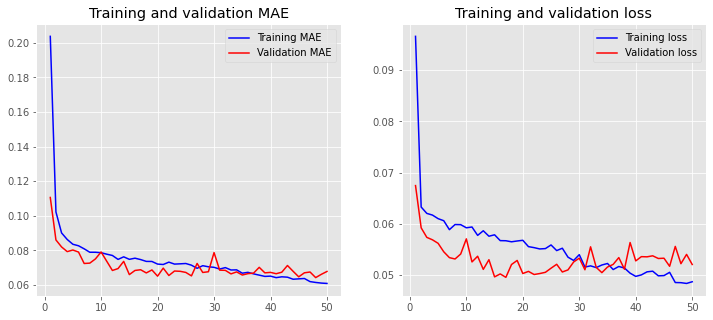

In [29]:
import matplotlib.pyplot as plt
# Enable inline plotting in notebook
%matplotlib inline

plt.style.use('ggplot')

def plot_history(history):
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(mae) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, mae, 'b', label='Training MAE')
    plt.plot(x, val_mae, 'r', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

Calculate performance on test data using the original scale.

In [30]:
pred_y = model.predict(test_X_scale)

# Calculate performance metrics
import numpy as np
from sklearn import metrics
print("Test MAE:",
      round(metrics.mean_absolute_error(test_y, pred_y),3))
print("Test RMSE:",
      round(np.sqrt(metrics.mean_squared_error(test_y, pred_y)),3))
print("Test R Squared:",
      round(metrics.r2_score(test_y, pred_y),3))

Test MAE: 0.5
Test RMSE: 0.5
Test R Squared: -0.048


In [31]:
test_loss, test_acc = model2.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

44/44 [==============================] - 0s 2ms/step - loss: 0.5590 - mae: 0.5596
Test accuracy: 0.5595875978469849


Using tesorflow and Keras

In [22]:
import tensorflow as tf
from tensorflow import keras
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_X, train_y, epochs=250, batch_size=1)

Epoch 1/250
3220/3220 [==============================] - 7s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 2/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 3/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 4/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 5/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 6/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 7/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 8/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 9/250
3220/3220 [==============================] - 6s 2ms/step - loss: 9.1734 - accuracy: 0.3984
Epoch 10/250
3220/3220 [==============================] - 6s 2ms/step - l

In [25]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

44/44 [==============================] - 0s 2ms/step - loss: 9.1677 - accuracy: 0.3975
Test accuracy: 0.3975380063056946
